## Support Vector Classifier Implementation

The Support Vector Classifier (SVC), also known as Support Vector Machine (SVM), is a powerful supervised learning algorithm used for classification tasks. SVC works by finding the hyperplane that best separates the classes in the feature space, maximizing the margin between the classes while minimizing classification errors. SVC is effective in handling both linearly separable and non-linearly separable datasets through the use of different kernel functions.

Key Concepts and Techniques:

- Hyperplane: In SVC, the goal is to find the hyperplane that best separates the classes in the feature space. A hyperplane is a decision boundary that divides the feature space into two regions, with each region corresponding to a different class label.

- Margin: SVC seeks to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors. Maximizing the margin helps improve the generalization performance of the classifier and reduces the risk of overfitting.

- Kernel Trick: SVC can handle non-linearly separable datasets by mapping the original feature space into a higher-dimensional space using a kernel function. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels. The choice of kernel function can significantly impact the performance of the SVC classifier.

- Regularization Parameter (C): SVC introduces a regularization parameter (C) to control the trade-off between maximizing the margin and minimizing classification errors. A smaller value of C results in a wider margin but may lead to more misclassifications, while a larger value of C allows for fewer misclassifications but may result in a narrower margin.

- Multi-Class Classification: SVC inherently supports multi-class classification tasks through one-vs-one (OvO) or one-vs-rest (OvR) strategies. In OvO strategy, a separate binary classifier is trained for each pair of classes, while in OvR strategy, a separate binary classifier is trained for each class against the rest.

- Kernel Selection: The choice of kernel function and its associated parameters (e.g., degree for polynomial kernel, gamma for RBF kernel) is crucial for the performance of the SVC classifier. Grid search and cross-validation techniques can be used to select the optimal kernel and hyperparameters.

- Implementation: SVC is implemented in libraries such as scikit-learn, which provides efficient implementations of various SVC algorithms, kernel functions, and hyperparameter tuning techniques. Scikit-learn also offers tools for model evaluation, cross-validation, and performance metrics.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [ ]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [ ]:
X

array([[ 1.17086612,  0.9282115 ],
       [-3.75235832,  3.51186539],
       [ 0.0407992 ,  0.58812191],
       ...,
       [ 1.62713105, -0.65936517],
       [-0.6119673 , -2.06074732],
       [-0.89141479, -1.30817304]])

In [ ]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
pd.DataFrame(X)[0]

0      1.170866
1     -3.752358
2      0.040799
3      0.951658
4      0.944203
         ...   
995    0.645227
996    0.916623
997    1.627131
998   -0.611967
999   -0.891415
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

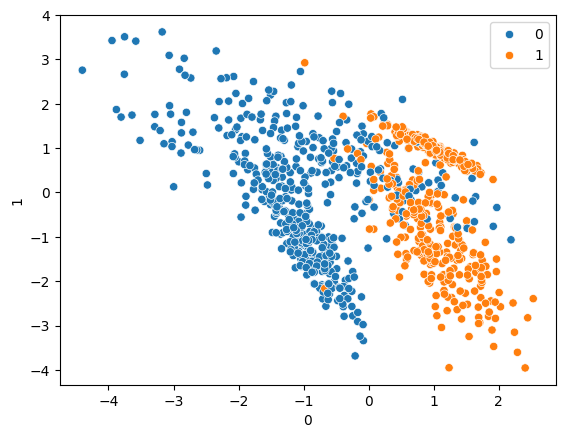

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear')

In [ ]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
## Prediction
y_pred=svc.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       138
           1       0.88      0.95      0.91       112

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[124  14]
 [  6 106]]
0.92


## Hyperparametere Tuning With SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [ ]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       138
           1       0.86      0.95      0.90       112

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[121  17]
 [  6 106]]
0.92
